# Traffic Signs Recognition

### Goal of this project: 
Given a various traffic signs along with images dataset,  
we are challenged to classify traffic signs present in the image into different categories.

### Notebook Workflow:
- Setup Libraries
- Load the Data
- Preprocessing 
- Baseline (Logistic Regression)
- Build Convolutional Neural Networks (CNN)
- Applying Transfer Learning 

### Extra:
- Visualization
- Prediction Application

# 

### 1. Setup Libraries:

#### Data manipulation and Preprocessing libraries:

In [49]:
import os
import pathlib
import numpy as np
import pandas as pd

#### Visualization libraries:

In [2]:
import matplotlib.pyplot as plt

#### Sci-Kit Learn libraries:

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.linear_model    import LogisticRegression

In [5]:
from sklearn.preprocessing   import StandardScaler

In [6]:
from sklearn.metrics         import accuracy_score

#### Tensorflow libraries:

In [7]:
import keras 

In [8]:
from keras.models                          import Sequential

In [9]:
from tensorflow.keras.utils                import to_categorical

In [10]:
from tensorflow.keras.applications         import mobilenet_v2

In [11]:
from tensorflow.keras.models               import Model

In [48]:
from sklearn.utils                         import class_weight 

In [12]:
from tensorflow.keras.layers               import Conv2D, MaxPool2D, Dense, Flatten, Dropout, MaxPooling2D, GlobalAveragePooling2D 

In [13]:
from tensorflow.keras.preprocessing.image  import ImageDataGenerator, img_to_array, array_to_img, load_img

# 

### 2. Load The Data 

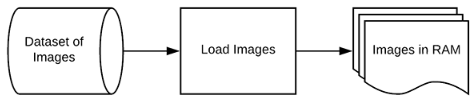

In [14]:
data_path  = '/Users/macbookproretina13inch/Downloads/German/Train'

In [15]:
def load_data(data_dir):
    images = list()
    labels = list()
    for category in range(num_categories):
        categories = os.path.join(data_dir, str(category))
        for img in os.listdir(categories):
            img   = load_img(os.path.join(categories, img), target_size=(32, 32))
            image = img_to_array(img)
            images.append(image)
            labels.append(category)    
    return images, labels

In [16]:
num_categories = len(os.listdir(data_path))
num_categories

43

In [74]:
images, labels = load_data(data_path)

In [75]:
images = np.array(images)

In [ ]:
#labels = np.array(labels)

# 

### 3. Preprocessing

- Set height and width size for the images

In [76]:
img_height = 32
img_width  = 32

- Set the Labels (Classes)

In [20]:
# Label Overview
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

- Let's check how our labels are distributed ?

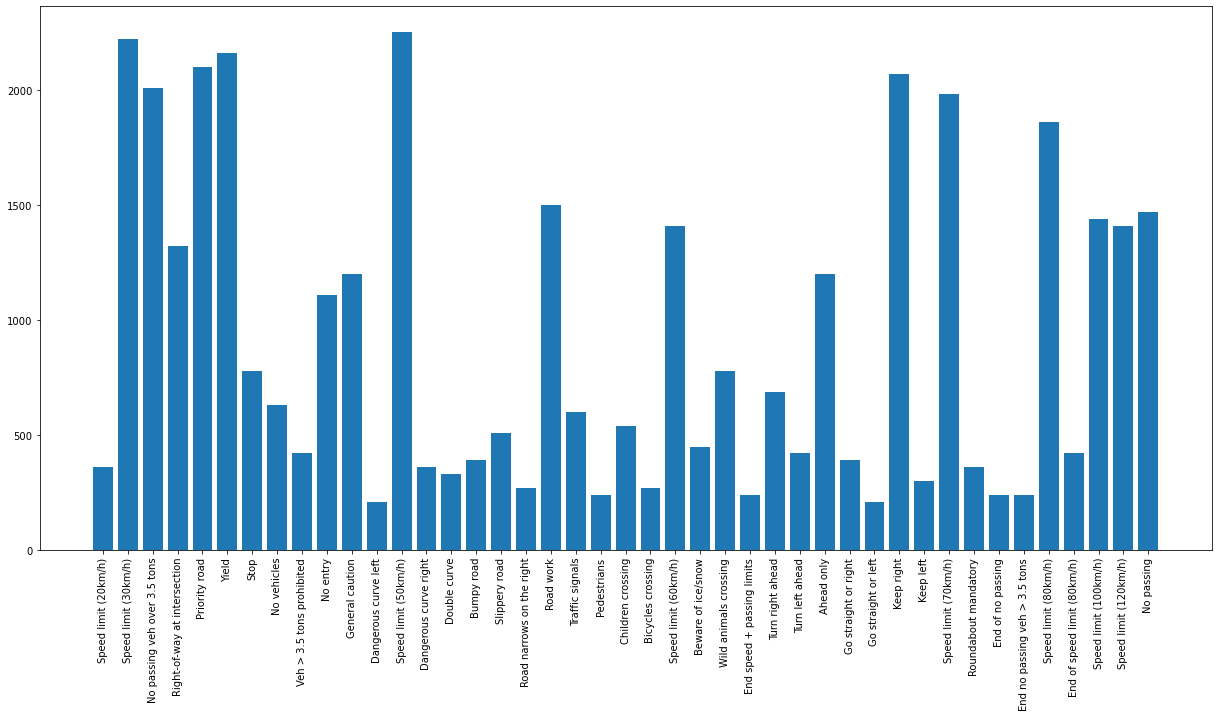

In [21]:
folders = os.listdir(data_path)
train_number = []
class_num    = []

for folder in folders:
    train_files = os.listdir(data_path + '/' + folder)
    train_number.append(len(train_files))
    class_num.append(classes[int(folder)])
    

plt.figure(figsize=(21,10))  
plt.bar(class_num, train_number)
plt.xticks(class_num, rotation='vertical')
plt.show()

-  Considering the types of traffic signs, we found that there is a huge difference in the preparation of the different classes,  
Let's see how keras model will handling the class Imbalance struggle

### Baseline Preprocessing 

- Reshape the size of images 

In [77]:
len(images)

39359

In [78]:
images.shape

(39359, 32, 32, 3)

In [79]:
images_reshaped = images.reshape(39359,32*32*3) # for baseline

In [80]:
images_reshaped.shape 

(39359, 3072)

# 

#### Spliting the images into train,  validation  and test sets

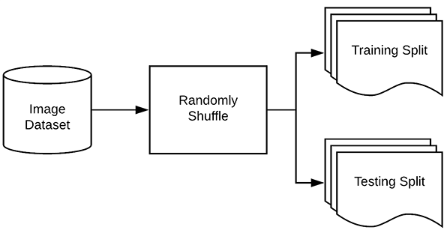

In [81]:
X, X_test, y, y_test = train_test_split(images_reshaped, labels, test_size=.2, random_state=10, shuffle=True)

In [82]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=10, shuffle=True)

# 

### 4. Baseline(Logistic Regression)

In [83]:
lm = LogisticRegression(multi_class='ovr', solver='liblinear', max_iter=15)

- Feature scaling for train, val, and test so that we can run our model

In [84]:
scaler = StandardScaler()

In [85]:
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled   = scaler.transform(X_val)
X_test_scaled  = scaler.transform(X_test)

In [ ]:
# Validate score
lm.fit(X_train, y_train)
print(f'Logistic Regression val R^2:  {lm.score(X_val, y_val):.3f}')

In [ ]:
# Test score
lm.fit(X,y)
print(f'Logistic Regression test R^2:{lm.score(X_test, y_test):.3f}')

Wow! , we get  92%  accuracy in our Baseline, but do we can get more with Deep learning models? 

# 

#### -   Preprocessing for Deep learning models: 

In [ ]:
# One-hot encode the labels

In [31]:
labels = to_categorical(labels)

In [ ]:
# re-split 

In [32]:
X, X_test, y, y_test = train_test_split(images, labels, test_size=.2, random_state=10, shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=10, shuffle=True)

In [ ]:
# Normalization 

In [33]:
X_train /= 255
X_val   /= 255
X_test  /= 255

In [ ]:
#shape overview

In [34]:
print('X_train shape:', X_train.shape)
print('Number of images in X_train', X_train.shape[0])

X_train shape: (23615, 32, 32, 3)
Number of images in X_train 23615


In [35]:
print('X_val shape:', X_val.shape)
print('Number of images in X_val', X_val.shape[0])

X_val shape: (7872, 32, 32, 3)
Number of images in X_val 7872


In [36]:
print('X_val shape:', X_test.shape)
print('Number of images in X_val', X_test.shape[0])

X_val shape: (7872, 32, 32, 3)
Number of images in X_val 7872


In [37]:
print('y_train shape:', y_train.shape)
print('Number of images in y_train', y_train.shape[0])

y_train shape: (23615, 43)
Number of images in y_train 23615


In [38]:
print('y_val shape:', y_val.shape)
print('Number of images in y_val', y_val.shape[0])

y_val shape: (7872, 43)
Number of images in y_val 7872


In [39]:
print('y_val shape:', y_test.shape)
print('Number of images in y_val', y_test.shape[0])

y_val shape: (7872, 43)
Number of images in y_val 7872


In [40]:
input_shape=(32,32,3)

# 

### 5. Build Convolutional Neural Networks (CNN)

In [41]:
model = Sequential()

# First Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=input_shape))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

# Second Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

# Third Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))

model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dense(num_categories, activation='softmax'))

# Compiling the model
lr = 0.001
model.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          3

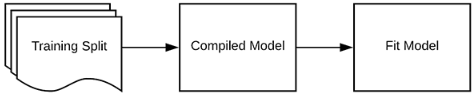

In [42]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val ) ,epochs=15)

Epoch 1/15
738/738 [==============================] - 42s 51ms/step - loss: 1.7002 - accuracy: 0.5305 - val_loss: 0.4511 - val_accuracy: 0.8697
Epoch 2/15
738/738 [==============================] - 40s 54ms/step - loss: 0.4117 - accuracy: 0.8732 - val_loss: 0.1833 - val_accuracy: 0.9544
Epoch 3/15
738/738 [==============================] - 35s 48ms/step - loss: 0.2361 - accuracy: 0.9270 - val_loss: 0.1546 - val_accuracy: 0.9602
Epoch 4/15
738/738 [==============================] - 35s 48ms/step - loss: 0.1673 - accuracy: 0.9486 - val_loss: 0.1075 - val_accuracy: 0.9680
Epoch 5/15
738/738 [==============================] - 42s 57ms/step - loss: 0.1325 - accuracy: 0.9595 - val_loss: 0.0838 - val_accuracy: 0.9789
Epoch 6/15
738/738 [==============================] - 32s 43ms/step - loss: 0.1083 - accuracy: 0.9665 - val_loss: 0.0660 - val_accuracy: 0.9837
Epoch 7/15
738/738 [==============================] - 37s 50ms/step - loss: 0.0948 - accuracy: 0.9693 - val_loss: 0.0712 - val_accuracy:

#### Display of the accuracy and the loss values

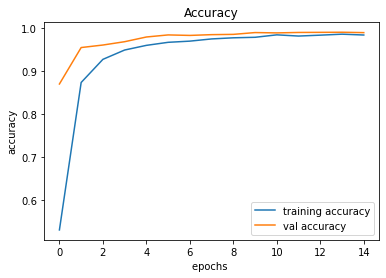

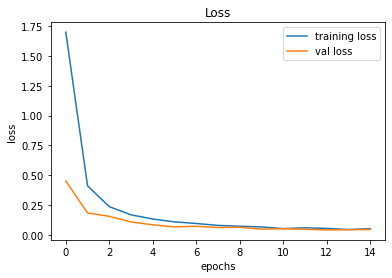

In [43]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs ')
plt.ylabel('accuracy')
plt.legend()
plt.figure(1)


plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

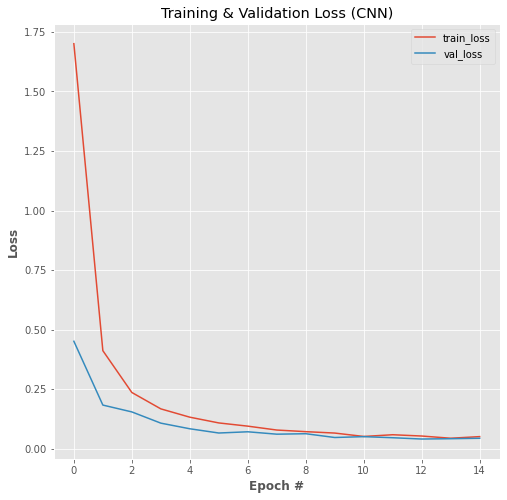

In [44]:
# plot the training and validation loss
N = np.arange(0, 15)
plt.style.use("ggplot")
plt.figure(figsize = [8,8])
plt.plot(N, history.history["loss"], label="train_loss")
plt.plot(N, history.history["val_loss"], label="val_loss")
plt.title("Training & Validation Loss (CNN)")
plt.xlabel("Epoch #", weight="bold")
plt.ylabel("Loss", weight="bold")
plt.legend()
plt.show()

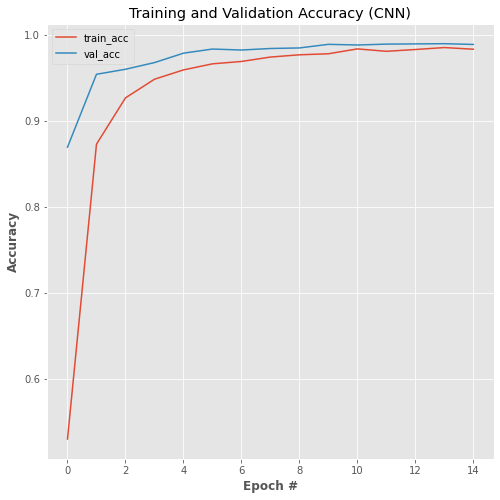

In [45]:
# plot the training and validation accuracy
N = np.arange(0, 15)
plt.style.use("ggplot")
plt.figure(figsize = [8,8])
plt.plot(N, history.history["accuracy"], label="train_acc")
plt.plot(N, history.history["val_accuracy"], label="val_acc")
plt.title("Training and Validation Accuracy (CNN)")
plt.xlabel("Epoch #", weight="bold")
plt.ylabel("Accuracy", weight="bold")
plt.legend()
plt.show()

#### Accuracy Score of CNN model

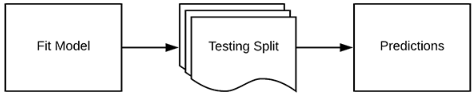

In [46]:
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).astype(int)

In [47]:
accuracy_score(y_test, y_pred)

0.9870426829268293

#### Handling the class Imbalance struggle

In [50]:
df = pd.read_csv('Test.csv')

In [51]:
df

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png
...,...,...,...,...,...,...,...,...
12625,42,41,5,6,37,36,12,Test/12625.png
12626,50,51,6,5,45,46,33,Test/12626.png
12627,29,29,6,6,24,24,6,Test/12627.png
12628,48,49,5,6,43,44,7,Test/12628.png


In [52]:
class_weights = class_weight.compute_class_weight('balanced',np.unique(df['ClassId']),df['ClassId'])
class_weights = dict(enumerate(class_weights))

/Users/macbookproretina13inch/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass classes=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42], y=0        16
1         1
2        38
3        33
4        11
         ..
12625    12
12626    33
12627     6
12628     7
12629    10
Name: ClassId, Length: 12630, dtype: int64 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [53]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val ) ,epochs=10,class_weight=class_weights)

Epoch 1/10
738/738 [==============================] - 29s 38ms/step - loss: 0.1076 - accuracy: 0.9722 - val_loss: 0.0524 - val_accuracy: 0.9870
Epoch 2/10
738/738 [==============================] - 29s 39ms/step - loss: 0.0498 - accuracy: 0.9827 - val_loss: 0.0500 - val_accuracy: 0.9879
Epoch 3/10
738/738 [==============================] - 32s 44ms/step - loss: 0.0581 - accuracy: 0.9834 - val_loss: 0.0547 - val_accuracy: 0.9870
Epoch 4/10
738/738 [==============================] - 38s 52ms/step - loss: 0.0399 - accuracy: 0.9842 - val_loss: 0.0489 - val_accuracy: 0.9884
Epoch 5/10
738/738 [==============================] - 34s 46ms/step - loss: 0.0630 - accuracy: 0.9798 - val_loss: 0.0422 - val_accuracy: 0.9909
Epoch 6/10
738/738 [==============================] - 27s 36ms/step - loss: 0.0323 - accuracy: 0.9865 - val_loss: 0.0404 - val_accuracy: 0.9910
Epoch 7/10
738/738 [==============================] - 26s 36ms/step - loss: 0.0342 - accuracy: 0.9860 - val_loss: 0.0687 - val_accuracy:

In [54]:
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).astype(int)
accuracy_score(y_test, y_pred)

0.9884400406504065

# 

### 6. Applying Transfer Learning (MobileNet)

-  MobileNets: Efficient Convolutional Neural Networks for Mobile Vision Applications

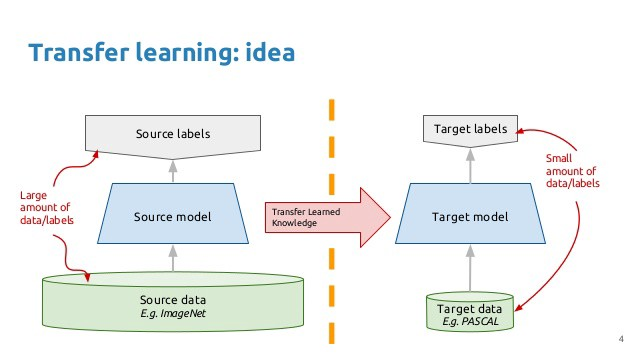

- Set the pre-trained model from Keras.

In [55]:
mobile = keras.applications.mobilenet.MobileNet()
def prepare_image(file):
    img_path = ''
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

- Freeze the base layers and Add new "top" layer.

In [56]:
base_model= mobilenet_v2.MobileNetV2(weights='imagenet',include_top=False, input_shape=input_shape) #imports the mobilenet model and discards the last 1000 neuron layer.

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x)  #dense layer 3
preds=Dense(43,activation='softmax')(x) #final layer with softmax activation

- Specify the inputs and the outputs to be based on our architecture

In [57]:
model=Model(inputs=base_model.input,outputs=preds)

- Check the model architecture

In [58]:
for i,layer in enumerate(model.layers):
     print(i,layer.name)

0 input_2
1 Conv1
2 bn_Conv1
3 Conv1_relu
4 expanded_conv_depthwise
5 expanded_conv_depthwise_BN
6 expanded_conv_depthwise_relu
7 expanded_conv_project
8 expanded_conv_project_BN
9 block_1_expand
10 block_1_expand_BN
11 block_1_expand_relu
12 block_1_pad
13 block_1_depthwise
14 block_1_depthwise_BN
15 block_1_depthwise_relu
16 block_1_project
17 block_1_project_BN
18 block_2_expand
19 block_2_expand_BN
20 block_2_expand_relu
21 block_2_depthwise
22 block_2_depthwise_BN
23 block_2_depthwise_relu
24 block_2_project
25 block_2_project_BN
26 block_2_add
27 block_3_expand
28 block_3_expand_BN
29 block_3_expand_relu
30 block_3_pad
31 block_3_depthwise
32 block_3_depthwise_BN
33 block_3_depthwise_relu
34 block_3_project
35 block_3_project_BN
36 block_4_expand
37 block_4_expand_BN
38 block_4_expand_relu
39 block_4_depthwise
40 block_4_depthwise_BN
41 block_4_depthwise_relu
42 block_4_project
43 block_4_project_BN
44 block_4_add
45 block_5_expand
46 block_5_expand_BN
47 block_5_expand_relu
48 b

- Compiling the model and check the summary

In [59]:
model.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 16, 16, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 16, 16, 32)   128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 16, 16, 32)   0           bn_Conv1[0][0]                   
______________________________________________________________________________________________

- Train the model

In [60]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val) ,epochs=15)

Epoch 1/15
738/738 [==============================] - 162s 212ms/step - loss: 1.8283 - accuracy: 0.4614 - val_loss: 2.3963 - val_accuracy: 0.3469
Epoch 2/15
738/738 [==============================] - 163s 221ms/step - loss: 0.9375 - accuracy: 0.7148 - val_loss: 2.2453 - val_accuracy: 0.4540
Epoch 3/15
738/738 [==============================] - 162s 220ms/step - loss: 0.6584 - accuracy: 0.8040 - val_loss: 1.7559 - val_accuracy: 0.5788
Epoch 4/15
738/738 [==============================] - 170s 230ms/step - loss: 0.5100 - accuracy: 0.8530 - val_loss: 2.0139 - val_accuracy: 0.6535
Epoch 5/15
738/738 [==============================] - 168s 227ms/step - loss: 0.3712 - accuracy: 0.8964 - val_loss: 0.7897 - val_accuracy: 0.8051
Epoch 6/15
738/738 [==============================] - 145s 196ms/step - loss: 0.3358 - accuracy: 0.9090 - val_loss: 0.6648 - val_accuracy: 0.8369
Epoch 7/15
738/738 [==============================] - 151s 205ms/step - loss: 0.3008 - accuracy: 0.9202 - val_loss: 0.5289 -

- Accuracy score after applying the pretrained model

In [61]:
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).astype(int)

In [62]:
accuracy_score(y_test, y_pred)

0.9048526422764228

Although we apply pre-traind model over our architecture, we get less Accuracy.

### Extra - Visualization

- Visualizing all the different Signs

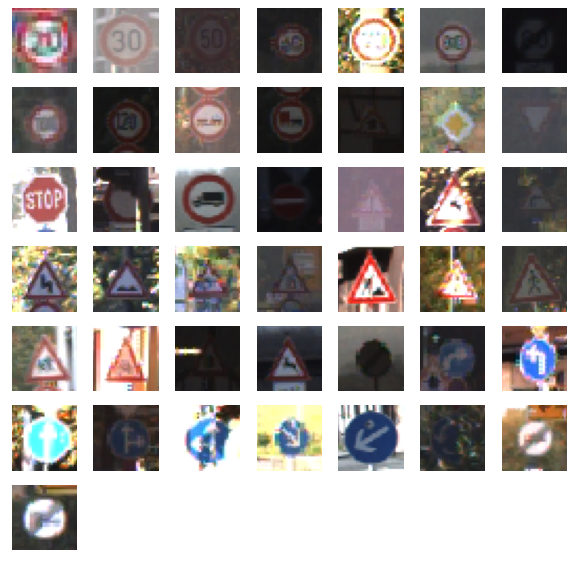

In [63]:
img_dir = pathlib.Path(data_path)
plt.figure(figsize=(10,10))
index = 0

for i in range(num_categories):
    plt.subplot(7, 7, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    sign = list(img_dir.glob(f'{i}/*'))[0]
    img = load_img(sign, target_size=(img_width, img_height))
    plt.imshow(img)
plt.show()

- Prediction Application

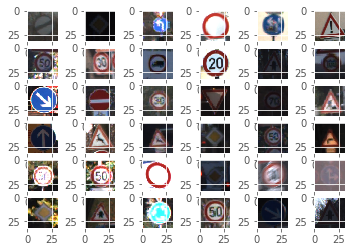

In [64]:
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.imshow(X_test[i])

In [65]:
image_index = 12

3072
The predicted image is Keep right


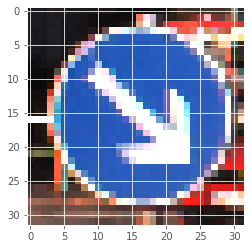

In [66]:
plt.imshow(X_test[image_index])
n = np.array(X_test[image_index])
print(n.size)
p = n.reshape(1, 32, 32, 3)
pred = classes[model.predict(p).argmax()]
print("The predicted image is {}".format(pred))

#### - End of this notebook - 